In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Flow of this Project

* ***Data Preprocessing***
* ***Exploratory Data Analysis***
* ***Text Preprocessing***
* ***Model Building***
* ***Model Evaluation***
* ***Model Improvement & Optimization***
* ***API***
* ***Model Deployment***

In [3]:
df.shape

(5572, 5)

In [4]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
# Droping the last 3 columns/features

In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [9]:
# Checking for duplicate rows/observations

In [10]:
df.duplicated().sum()

403

In [11]:
df=df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
# Renaming columns/features

In [14]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [15]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# Applying label encoding on the target columns/features

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
encoder=LabelEncoder()

In [19]:
df['target']=encoder.fit_transform(df['target'])

## EDA

In [20]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

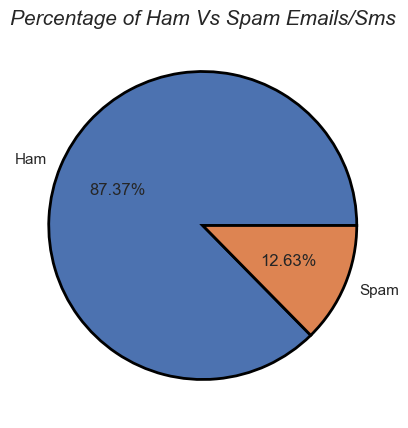

In [22]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(7,5))
plt.pie(df['target'].value_counts(),labels=['Ham','Spam'],wedgeprops={"edgecolor":'black','linewidth':2},autopct="%.2f%%")
plt.title("Percentage of Ham Vs Spam Emails/Sms",fontsize=15,fontstyle='italic')
plt.show()

***There is a slight imbalance in the data(Ham emails are present in higher amount as compared to spam emails)***

In [23]:
# Now we will count the number of characters,words and sentences present in the text feature
# To perform this we will make use of natural language tool kit

In [24]:
import nltk

In [25]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [26]:
# Creating a new feature for number of characters

In [27]:
df['num_characters']=df['text'].apply(len)

In [28]:
# Doing the same process for the number of words and number of sentences

In [29]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
# Now for the descriptive statistics we use the desribe function

In [34]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [35]:
# For ham emails

In [36]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [37]:
# For spam emails

In [38]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


***The number of characters,words,sentences are higher for spam emails as compared to ham emails.***

In [39]:
# Plotting a histogram for visualization

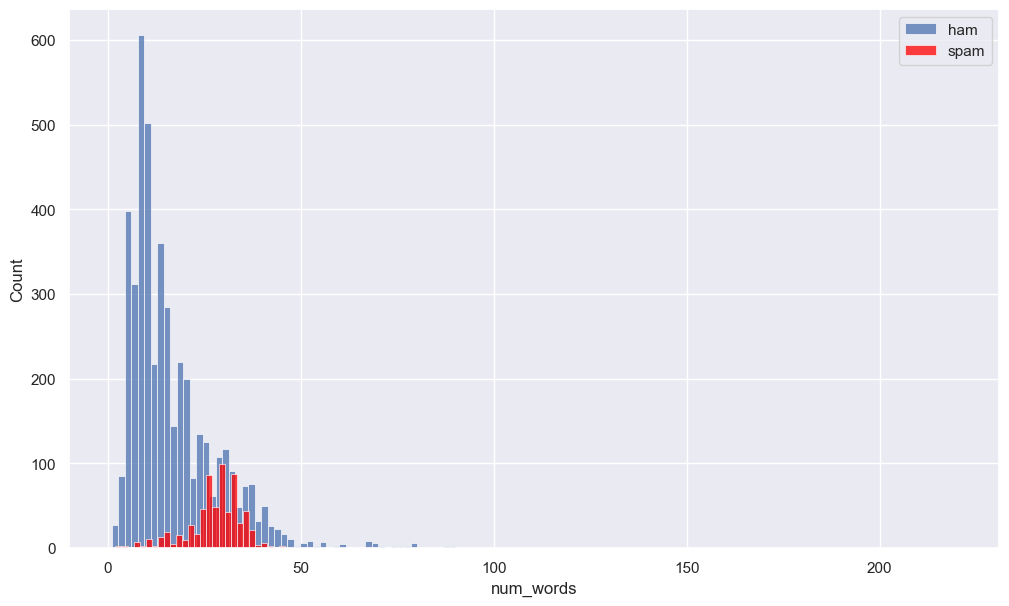

In [40]:
plt.figure(figsize=(12,7))
sns.histplot(df[df['target']==0]['num_words'],label='ham')
sns.histplot(df[df['target']==1]['num_words'],color='red',label='spam')
plt.legend()
plt.show()

In [41]:
# Now creating a correlation matrix to see the correlations between the features

In [42]:
df.corr()

C:\Users\rohan\AppData\Local\Temp\ipykernel_13316\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


In [43]:
# Visualizing in the form of a heatmap

C:\Users\rohan\AppData\Local\Temp\ipykernel_13316\3282207013.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


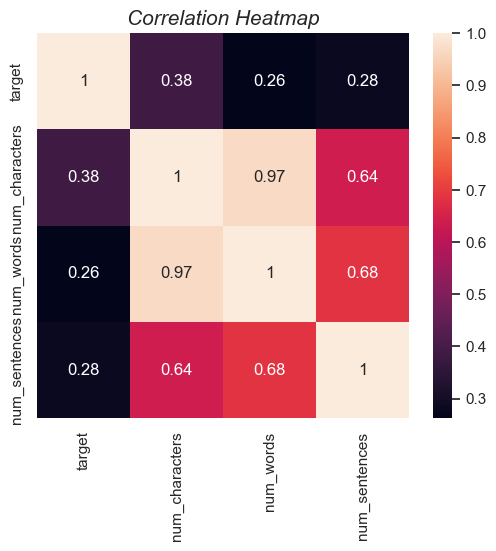

In [44]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Heatmap",fontsize=15,fontstyle='italic')
plt.show()

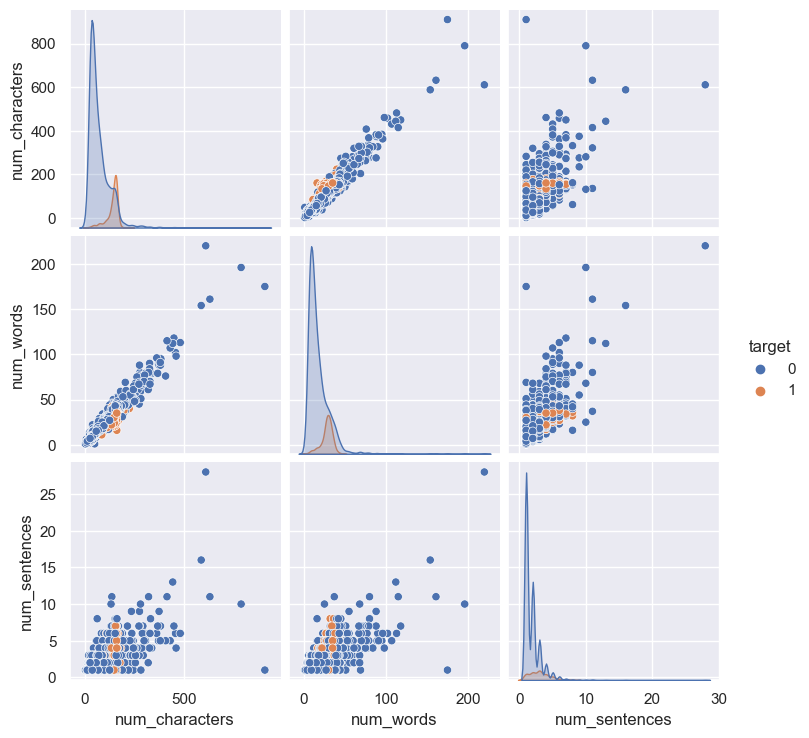

In [45]:
sns.pairplot(df,hue='target')
plt.show()

## Text Preprocessing

* ***Converting to lower case***
* ***Tokenization***
* ***Removing stopwords and punctuation***
* ***Removing special characters***
* ***Stemming***

In [46]:
# Importing all the required libraries

In [47]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [48]:
ps=PorterStemmer()

In [49]:
# Creating a function to perform all these tasks

In [50]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    x=[]
    for i in text:
        if i.isalnum():
            x.append(i)
            
    y=[]
    for i in x:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    z=[]
    for i in y:
            z.append(ps.stem(i))
    
    return" ".join(z)
    
            

In [51]:
df['transformed_text']=df['text'].apply(transform_text)

In [52]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
# Now creating a wordcloud to identify the most frequent or commonly occuring words in both ham and spam emails

In [54]:
from wordcloud import WordCloud

In [55]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [56]:
# For ham emails

In [57]:
ham_wc=df[df['target']==0]['transformed_text'].str.cat(sep=" ")
ham_wc=wc.generate(ham_wc)

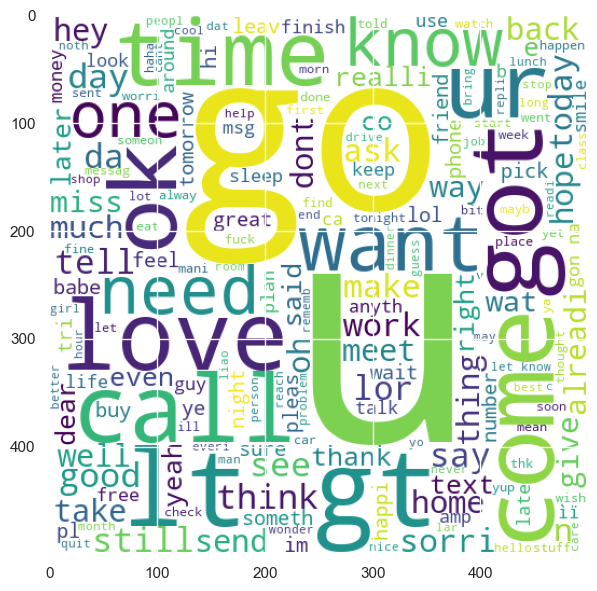

In [58]:
plt.figure(figsize=(7,7))
plt.imshow(ham_wc)
plt.show()

In [59]:
# For spam emails

In [60]:
spam_wc=df[df['target']==1]['transformed_text'].str.cat(sep=" ")
spam_wc=wc.generate(spam_wc)

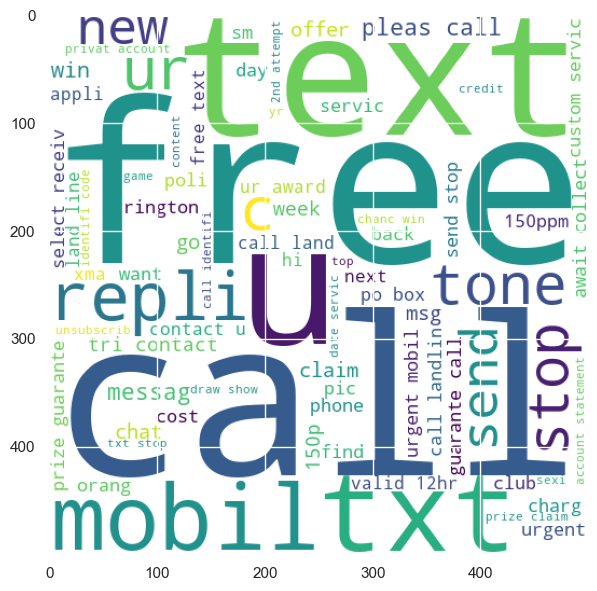

In [61]:
plt.figure(figsize=(7,7))
plt.imshow(spam_wc)
plt.show()

## Model Building

In [62]:
# First we will vectorize the text

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
vector=CountVectorizer()

In [65]:
X=vector.fit_transform(df['transformed_text']).toarray()

In [66]:
y=df['target'].values

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [69]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [70]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier(max_depth=5)
svm=SVC(kernel='sigmoid')
rf=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

In [71]:
clfs={
    'gnb':gnb,
    'mnb':mnb,
    'bnb':bnb,
    'lr':lr,
    'knn':knn,
    'dt':dt,
    'svm':svm,
    'rf':rf,
    'abc':abc,
    'gbc':gbc,
    'xgb':xgb,
    'etc':etc
}

In [72]:
from sklearn.metrics import accuracy_score,precision_score

In [73]:
def train_model(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [74]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    x,y=train_model(clf,X_train,X_test,y_train,y_test)
    print("For",name)
    print("Accuracy Score",x)
    print("Precision Score",y)
    accuracy_scores.append(x)
    precision_scores.append(y)

For gnb
Accuracy Score 0.8800773694390716
Precision Score 0.5315315315315315
For mnb
Accuracy Score 0.9642166344294004
Precision Score 0.8344370860927153
For bnb
Accuracy Score 0.9700193423597679
Precision Score 0.9734513274336283
For lr
Accuracy Score 0.9787234042553191
Precision Score 0.9915254237288136
For knn
Accuracy Score 0.90715667311412
Precision Score 1.0
For dt
Accuracy Score 0.925531914893617
Precision Score 0.9420289855072463
For svm
Accuracy Score 0.9777562862669246
Precision Score 0.9831932773109243
For rf
Accuracy Score 0.971953578336557
Precision Score 1.0
For abc
Accuracy Score 0.9197292069632496
Precision Score 0.9365079365079365
For gbc
Accuracy Score 0.9439071566731141
Precision Score 0.9444444444444444
For xgb
Accuracy Score 0.9729206963249516
Precision Score 0.9661016949152542
For etc
Accuracy Score 0.9777562862669246
Precision Score 0.9914529914529915


In [75]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})
performance_df=performance_df.sort_values(by=['Precision','Accuracy'],ascending=False)
performance_df

,Algorithm,Accuracy,Precision
7,rf,0.971954,1.000000
4,knn,0.907157,1.000000
3,lr,0.978723,0.991525
11,etc,0.977756,0.991453
6,svm,0.977756,0.983193
2,bnb,0.970019,0.973451
10,xgb,0.972921,0.966102
9,gbc,0.943907,0.944444
5,dt,0.925532,0.942029
8,abc,0.919729,0.936508


## Model Improvement & Optimization

In [76]:
# Now Lets try to TfidfVectorizer instead of CountVectorizer

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [78]:
tfidf=TfidfVectorizer()

In [79]:
# Now repeating all the steps again

In [80]:
X=tfidf.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
y=df['target'].values

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [83]:
def train_model(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [84]:
accuracy_scores1=[]
precision_scores1=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_model(clf,X_train,X_test,y_train,y_test)
    print("For",name)
    print("Accuracy Score",current_accuracy)
    print("Precision Score",current_precision)
    accuracy_scores1.append(current_accuracy)
    precision_scores1.append(current_precision)

For gnb
Accuracy Score 0.8762088974854932
Precision Score 0.5231481481481481
For mnb
Accuracy Score 0.9593810444874274
Precision Score 1.0
For bnb
Accuracy Score 0.9700193423597679
Precision Score 0.9734513274336283
For lr
Accuracy Score 0.9477756286266924
Precision Score 0.9883720930232558
For knn
Accuracy Score 0.9003868471953579
Precision Score 1.0
For dt
Accuracy Score 0.937137330754352
Precision Score 0.8543689320388349
For svm
Accuracy Score 0.9729206963249516
Precision Score 0.9741379310344828
For rf
Accuracy Score 0.9738878143133463
Precision Score 1.0
For abc
Accuracy Score 0.9245647969052224
Precision Score 0.8409090909090909
For gbc
Accuracy Score 0.9526112185686654
Precision Score 0.9238095238095239
For xgb
Accuracy Score 0.9729206963249516
Precision Score 0.9365079365079365
For etc
Accuracy Score 0.9758220502901354
Precision Score 0.9829059829059829


In [85]:
performance_df1=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy1':accuracy_scores1,'Precision1':precision_scores1})
performance_df1

,Algorithm,Accuracy1,Precision1
0,gnb,0.876209,0.523148
1,mnb,0.959381,1.000000
2,bnb,0.970019,0.973451
3,lr,0.947776,0.988372
4,knn,0.900387,1.000000
5,dt,0.937137,0.854369
6,svm,0.972921,0.974138
7,rf,0.973888,1.000000
8,abc,0.924565,0.840909
9,gbc,0.952611,0.923810


In [86]:
# Merging the two data frames

In [87]:
performance_df=pd.merge(performance_df,performance_df1,on='Algorithm')
performance_df

,Algorithm,Accuracy,Precision,Accuracy1,Precision1
0,rf,0.971954,1.000000,0.973888,1.000000
1,knn,0.907157,1.000000,0.900387,1.000000
2,lr,0.978723,0.991525,0.947776,0.988372
3,etc,0.977756,0.991453,0.975822,0.982906
4,svm,0.977756,0.983193,0.972921,0.974138
5,bnb,0.970019,0.973451,0.970019,0.973451
6,xgb,0.972921,0.966102,0.972921,0.936508
7,gbc,0.943907,0.944444,0.952611,0.923810
8,dt,0.925532,0.942029,0.937137,0.854369
9,abc,0.919729,0.936508,0.924565,0.840909


In [88]:
# Lets try voting and stacking on the top 3 performing algorithms

In [89]:
from sklearn.ensemble import VotingClassifier

In [90]:
rf=RandomForestClassifier(n_estimators=50,random_state=2)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

In [91]:
voting=VotingClassifier(estimators=[('rf',rf),('mnb',mnb),('etc',etc)],voting='soft')

In [92]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('mnb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [93]:
y_pred=voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9729206963249516
Precision 1.0


In [94]:
# Now applying stacking 

In [95]:
from sklearn.ensemble import StackingClassifier

In [96]:
stacking=StackingClassifier([('rf',rf),('mnb',mnb),('etc',etc)],final_estimator=RandomForestClassifier())

In [97]:
stacking.fit(X_train,y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=2)),
                               ('mnb', MultinomialNB()),
                               ('etc',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [98]:
y_pred=stacking.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9738878143133463
Precision 0.9051094890510949


In [99]:
# So we are not getting improved results through voting and stacking therefore we can go for random forest for our 
# model since it is giving us the best accuracy and precision scores.

In [100]:
rf=RandomForestClassifier(n_estimators=50,random_state=2)

In [101]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

In [102]:
print("Accuracy",accuracy_score(y_test,rf.predict(X_test)))
print("Precision",precision_score(y_test,rf.predict(X_test)))

Accuracy 0.9738878143133463
Precision 1.0


In [103]:
import joblib

In [104]:
joblib.dump(rf,'spam_classifier_model.pkl')
joblib.dump(tfidf,'vectorizer.pkl')

['vectorizer.pkl']